In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive



--- Analyzing Paddy Disease Dataset ---

Image count per class:

class
Normal                      1764
Blast                       1738
Hispa                       1594
Dead_Heart                  1442
Tungro                      1088
Brown_Spot                   965
Downy_Mildew                 620
Bacterial_Leaf_Blight        479
Bacterial_Leaf_Streak        380
Bacterial_Panicle_Blight     337
False_Smut                   316
Name: count, dtype: int64

Total images: 10723


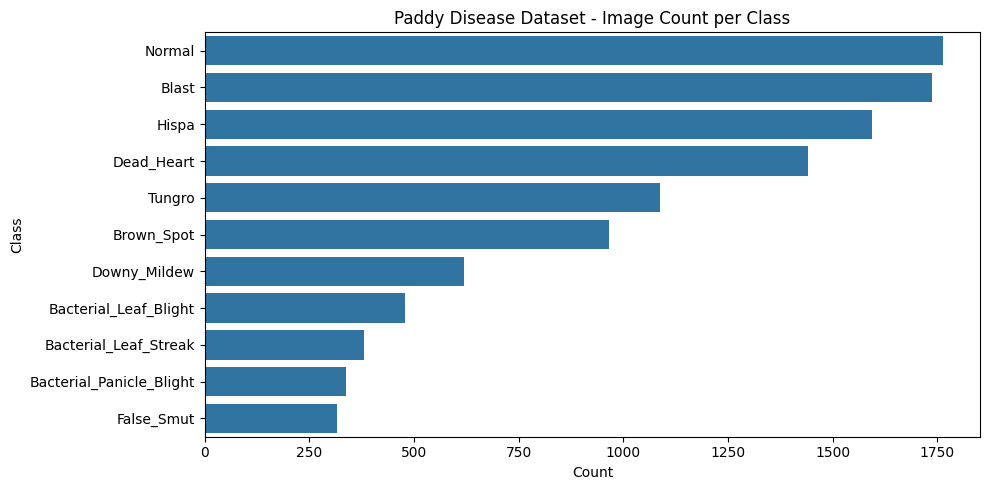


Image Dimension Stats:
Average Width: 484.4569616711741
Average Height: 639.5122633591345
Min Width: 220 Max Width: 1200
Min Height: 130 Max Height: 1202

File Size Stats (in KB):
Average Size: 76.48009462720321
Min Size: 8.064453125 Max Size: 251.0400390625

Image Format Distribution:
format
JPEG    10719
WEBP        4
Name: count, dtype: int64

--- Analyzing Paddy Deficiency Dataset ---

Image count per class:

class
Normal                   1764
Nitrogen_Deficiency       439
Potassium_Deficiency      384
Phosphorus_Deficiency     334
Name: count, dtype: int64

Total images: 2921


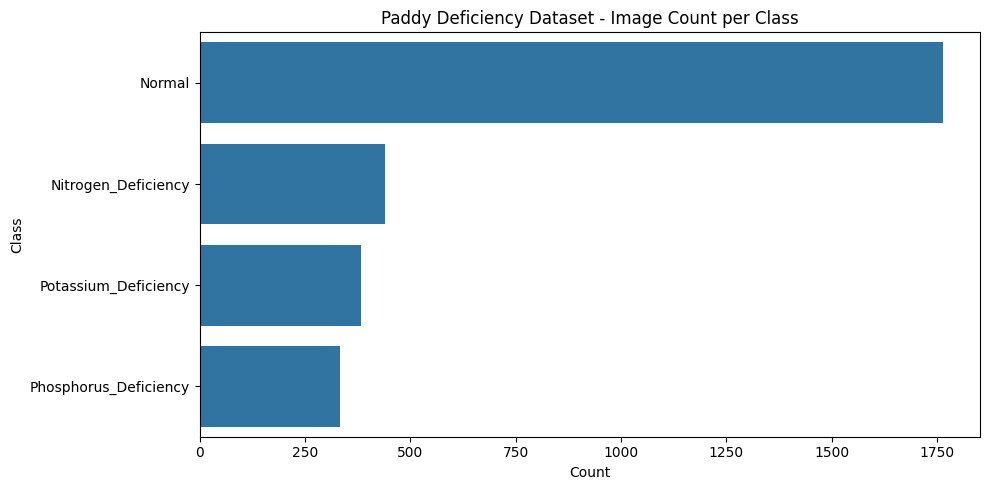


Image Dimension Stats:
Average Width: 543.3755563163301
Average Height: 640.0
Min Width: 480 Max Width: 640
Min Height: 640 Max Height: 640

File Size Stats (in KB):
Average Size: 66.40995699246834
Min Size: 21.509765625 Max Size: 119.171875

Image Format Distribution:
format
JPEG    2921
Name: count, dtype: int64


In [2]:
import os
from PIL import Image
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set up paths
disease_path = "/content/drive/MyDrive/Paddy_Dataset/Diseases/"
deficiency_path = "/content/drive/MyDrive/Paddy_Dataset/Deficiencies/"

def analyze_dataset(data_path, dataset_name="Dataset"):
    print(f"\n--- Analyzing {dataset_name} ---\n")

    class_names = os.listdir(data_path)
    image_data = []

    for class_name in class_names:
        class_dir = os.path.join(data_path, class_name)
        if not os.path.isdir(class_dir):
            continue

        for img_file in os.listdir(class_dir):
            img_path = os.path.join(class_dir, img_file)

            try:
                with Image.open(img_path) as img:
                    width, height = img.size
                    image_data.append({
                        "class": class_name,
                        "filename": img_file,
                        "width": width,
                        "height": height,
                        "format": img.format,
                        "size_kb": os.path.getsize(img_path) / 1024  # in KB
                    })
            except Exception as e:
                print(f"Error with image {img_path}: {e}")

    df = pd.DataFrame(image_data)

    # 1. Total images per class
    print("Image count per class:\n")
    print(df['class'].value_counts())
    print("\nTotal images:", len(df))

    # 2. Plot class distribution
    plt.figure(figsize=(10,5))
    sns.countplot(data=df, y='class', order=df['class'].value_counts().index)
    plt.title(f'{dataset_name} - Image Count per Class')
    plt.xlabel("Count")
    plt.ylabel("Class")
    plt.tight_layout()
    plt.show()

    # 3. Image dimension stats
    print("\nImage Dimension Stats:")
    print("Average Width:", df['width'].mean())
    print("Average Height:", df['height'].mean())
    print("Min Width:", df['width'].min(), "Max Width:", df['width'].max())
    print("Min Height:", df['height'].min(), "Max Height:", df['height'].max())

    # 4. File size stats
    print("\nFile Size Stats (in KB):")
    print("Average Size:", df['size_kb'].mean())
    print("Min Size:", df['size_kb'].min(), "Max Size:", df['size_kb'].max())

    # 5. Image format summary
    print("\nImage Format Distribution:")
    print(df['format'].value_counts())

    return df

# Run analysis on both datasets
disease_df = analyze_dataset(disease_path, "Paddy Disease Dataset")
deficiency_df = analyze_dataset(deficiency_path, "Paddy Deficiency Dataset")
